In [2]:
import numpy as np
import pandas as pd
from numpy.typing import ArrayLike
from scipy.integrate import odeint
from typing import List, Protocol, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
from ..src.ode.core import solve_ode
from ..src.ode.plotting import plot_gradient, plot_solution, plot_state_space
# class ODEModel(Protocol):
#     def __call__(self, state: ArrayLike, t: float) -> ArrayLike:
#         """Calling the ODEModel for a given time `t` should return the instantaneous rate of change."""
#         pass

#     def names(self) -> List[str]:
#         """The name of each state space variable."""
#         pass


ImportError: attempted relative import with no known parent package

In [ ]:

# def solve_ode(
#     time_points: ArrayLike, model: ODEModel, initial_conditions: ArrayLike
# ) -> pd.DataFrame:
#     solution = odeint(model, initial_conditions, time_points)
#     d = {name: solution[:, i] for i, name in enumerate(model.names())}
#     d["time"] = time_points
#     return pd.DataFrame(d)

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

# from matplotlib.collections import LineCollection


# def colored_line(x, y, c, ax, **lc_kwargs):
#     """
#     Plot a line with a color specified along the line by a third value.

#     It does this by creating a collection of line segments. Each line segment is
#     made up of two straight lines each connecting the current (x, y) point to the
#     midpoints of the lines connecting the current point with its two neighbors.
#     This creates a smooth line with no gaps between the line segments.

#     Parameters
#     ----------
#     x, y : array-like
#         The horizontal and vertical coordinates of the data points.
#     c : array-like
#         The color values, which should be the same size as x and y.
#     ax : Axes
#         Axis object on which to plot the colored line.
#     **lc_kwargs
#         Any additional arguments to pass to matplotlib.collections.LineCollection
#         constructor. This should not include the array keyword argument because
#         that is set to the color argument. If provided, it will be overridden.

#     Returns
#     -------
#     matplotlib.collections.LineCollection
#         The generated line collection representing the colored line.
#     """
#     if "array" in lc_kwargs:
#         warnings.warn('The provided "array" keyword argument will be overridden')

#     # Default the capstyle to butt so that the line segments smoothly line up
#     default_kwargs = {"capstyle": "butt"}
#     default_kwargs.update(lc_kwargs)

#     # Compute the midpoints of the line segments. Include the first and last points
#     # twice so we don't need any special syntax later to handle them.
#     x = np.asarray(x)
#     y = np.asarray(y)
#     x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
#     y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

#     # Determine the start, middle, and end coordinate pair of each line segment.
#     # Use the reshape to add an extra dimension so each pair of points is in its
#     # own list. Then concatenate them to create:
#     # [
#     #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
#     #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
#     #   ...
#     # ]
#     coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
#     coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
#     coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
#     segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

#     lc = LineCollection(segments, **default_kwargs)
#     lc.set_array(c)  # set the colors of each segment

#     return ax.add_collection(lc)


In [ ]:
class Lorenz:
    def __init__(self, sigma=10, rho=28, beta=8/3):
        self.sigma = sigma
        self.rho = rho
        self.beta = beta

    def __call__(self, x: np.ndarray,t: float):
        dx = np.zeros_like(x)
        dx[0] = self.sigma * (x[1] - x[0])
        dx[1] = x[0] * (self.rho - x[2]) - x[1]
        dx[2] = x[0] * x[1] - self.beta * x[2]
        return dx
    
    def names(self) -> List[str]:
        return ["x", "y", "z"]

In [ ]:
m = Lorenz()
t = np.linspace(0, 100, 10001)
df = solve_ode(t, m, [1,1,1])

In [ ]:
  
# def plot_state_space(df: pd.DataFrame, time_variable='time', variables: List[str]= []):
#     if len(variables) < 1:
#         variables = [c for c in df.columns if c != time_variable]
#     n = len(variables)
#     plt.figure(figsize=(4*n, 4*n))
#     for i in range(n):
#         for j in range(n):
#             plt.subplot(n, n, i*n + j + 1)
#             if i == j:
#                 sns.histplot(df[variables[i]], kde=True)
#             else:
#                 plt.scatter(df[variables[j]].values, df[variables[i]].values,
#                             s=0)
#                 ax = plt.gca()
#                 colored_line(df[variables[j]].values, df[variables[i]].values,
#                              df[time_variable].values, ax=ax, cmap='jet',linewidth=1)
#                 ax.set_xlabel(variables[j])
#                 ax.set_ylabel(variables[i])
                
# def plot_gradient(model: ODEModel, defaults: ArrayLike = None, t: float = 0, bounds: List[Tuple[float, float]] = None):
#     variables = model.names()
#     n = len(variables)
#     if defaults is None:
#         defaults = np.zeros(n)
#     if bounds is None:
#         bounds = [(-1, 1) for _ in range(n)]
#     plt.figure(figsize=(4*n, 4*n))
#     for fi in range(n):
#         for fj in range(n):
#             plt.subplot(n, n, fi*n + fj + 1)
#             if fi == fj:
#                 x = np.linspace(bounds[fi][0], bounds[fi][1], 20)
#                 y = np.zeros(len(x))
#                 for i, xi in enumerate(x):
#                     state = defaults.copy()
#                     state[fi] = xi
#                     y[i] = model(state, t)[fi]
#                 plt.plot(x, y)
#             else:
#                 x = np.linspace(bounds[fj][0], bounds[fj][1], 20)
#                 y = np.linspace(bounds[fi][0], bounds[fi][1], 20)
#                 X, Y = np.meshgrid(x, y)
#                 Z = np.zeros((len(y),len(x),2))
#                 for i, xi in enumerate(x):
#                     for j, yj in enumerate(y):
#                         state = defaults.copy()
#                         state[fi] = xi
#                         state[fj] = yj
#                         ddt = model(state, t)
#                         Z[i, j,0] = ddt[fj]
#                         Z[i, j,1] = ddt[fi]
#                 plt.quiver(X, Y, Z[:,:,0], Z[:,:,1])
#                 ax = plt.gca()
#                 ax.set_xlabel(variables[fj])
#                 ax.set_ylabel(variables[fi])
                
# def plot_solution(df: pd.DataFrame, time_variable='time', variables: List[str]= [], **kwargs):
#     if len(variables) < 1:
#         variables = [c for c in df.columns if c != time_variable]
#     n = len(variables)
#     for i in range(n):
#         plt.subplot(n, 1, i + 1)
#         plt.plot(df[time_variable].values, df[variables[i]].values,
#                              linewidth=0.5, color='k', **kwargs)
#         plt.ylabel(variables[i])
#     plt.xlabel(time_variable)

In [ ]:
plot_gradient(m, t=0, bounds=[(-20, 20), (-20, 20), (0, 50)], defaults=[1, 1, 1])

NameError: name 'plot_gradient' is not defined

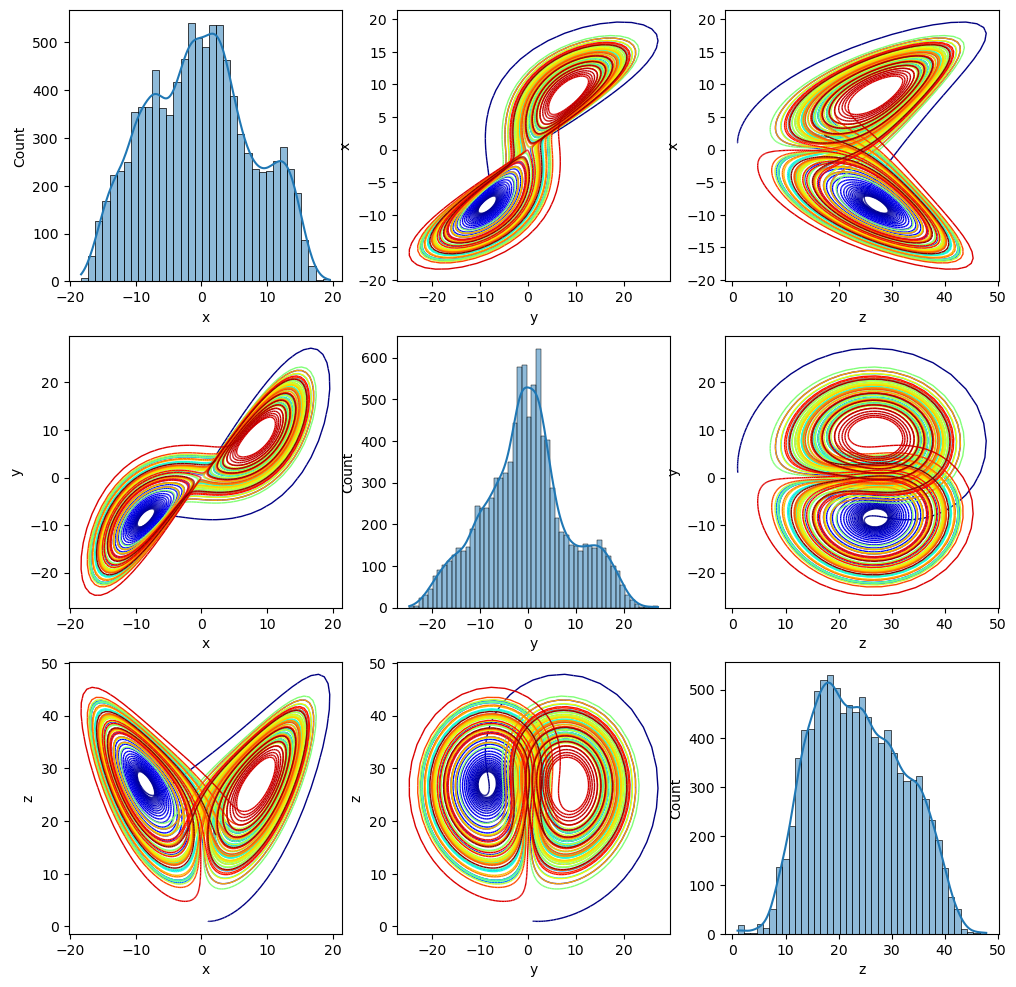

In [ ]:
plot_state_space(df)

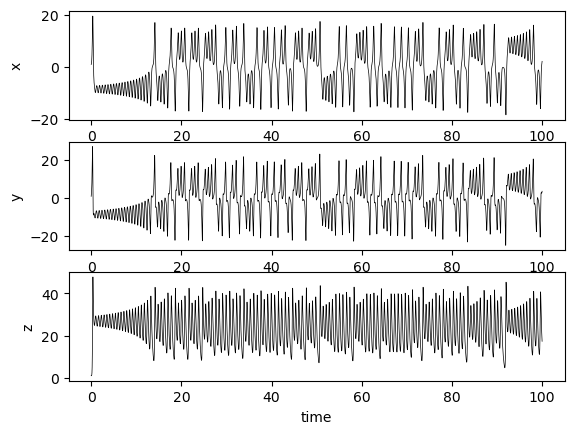

In [ ]:
plot_solution(df)

In [ ]:
df

,x,y,z,time
0,1.000000,1.000000,1.000000,0.00
1,1.012566,1.259920,0.984891,0.01
2,1.048821,1.524001,0.973114,0.02
3,1.107206,1.798315,0.965159,0.03
4,1.186865,2.088546,0.961737,0.04
...,...,...,...,...
9996,1.650136,3.041756,18.993336,99.96
9997,1.788593,3.169503,18.546236,99.97
9998,1.926971,3.316770,18.117660,99.98
9999,2.067167,3.484287,17.707916,99.99
